# Récupération du fichier .CIF


In [15]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator



key = "OeM7QMOQddQoMGfFB4h"
material = "mp-866132"
material_name = "Na₂TISb"
with MPRester(key) as m:
    struct = m.get_structure_by_material_id(material,conventional_unit_cell=True)
    w = CifWriter(struct)
    w.write_file(material+".cif") 
    print("Clique sur le lien pour télécharger mon fichier .CIF")
    display(FileLink(material+".cif"))

Clique sur le lien pour télécharger mon fichier .CIF


/home/users/h/u/husimon/lmapr/mp-866132.cif

# Consignes de la tâche :

La tâche qui nous est demandée est de déterminer les 3 premiers pics du diffractogramme (en indiquant les indices hkl associés) du matériau pour un rayonnement X incident Cu K$\alpha$ de longueur d'onde $\lambda = 1.5406 Å$. Ce rayonnement va créer des phénomènes d'interférences (constructives ou destructives) et donc de diffraction par la structure du cristal, que l'on peut analyser. Sur base du modèle de diffraction, nous pouvons trouver la position de chacun des atomes du cristal (en respectant certaines hypothèses). Ici, on considère $2\theta$ comme étant l'angle entre la direction d'incidence et celle d'observation.

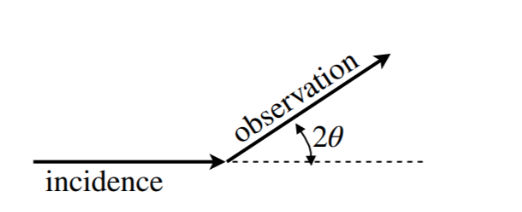

#  Calcul des pics

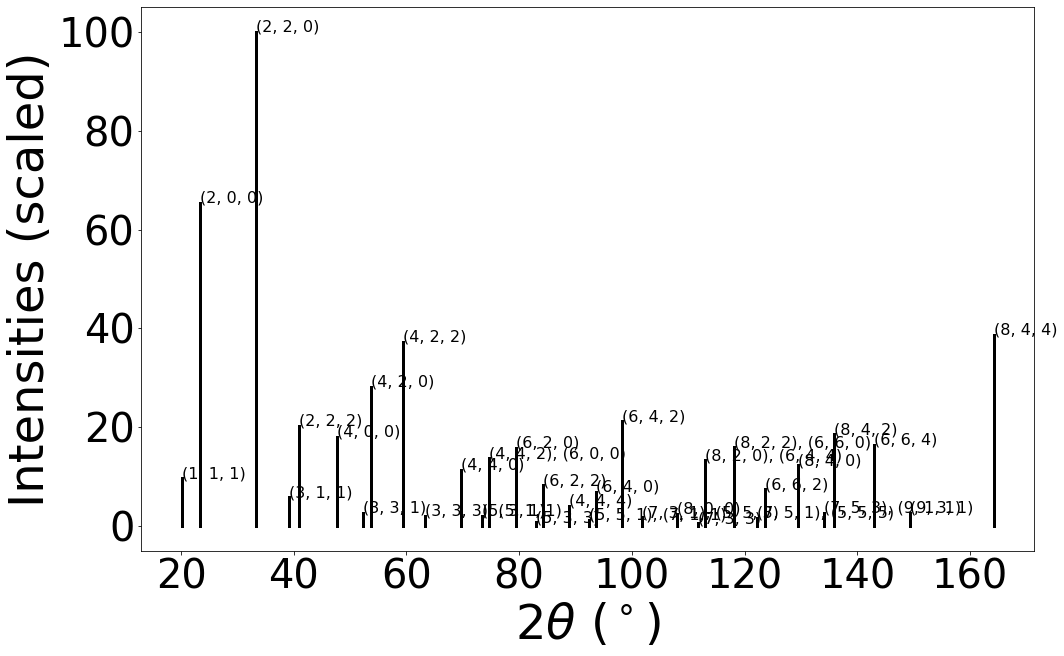

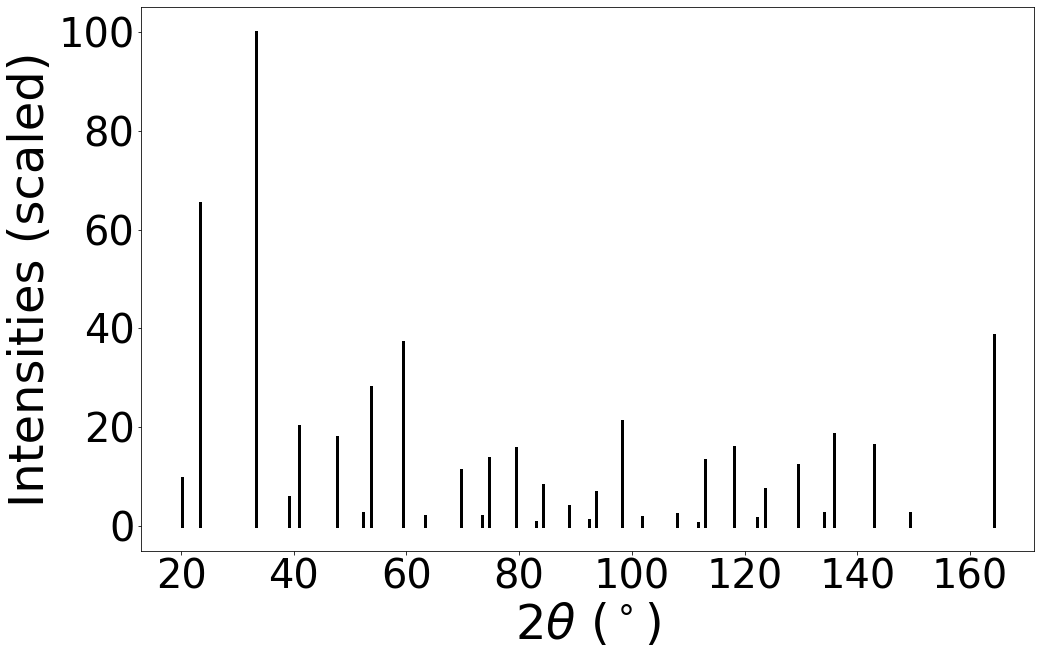

Pic de diffraction n°1
Angle du pic : 20.16920303431739
Intensité du pic : 9.694841480198534
Indices hkl du pic : (1, 1, 1)
Multiplicité du pic : 8
Pic de diffraction n°2
Angle du pic : 23.33016847189578
Intensité du pic : 65.39568432956709
Indices hkl du pic : (2, 0, 0)
Multiplicité du pic : 6
Pic de diffraction n°3
Angle du pic : 33.23015972297008
Intensité du pic : 100.00000000000001
Indices hkl du pic : (2, 2, 0)
Multiplicité du pic : 12


In [17]:
#Création d'un objet XRDCalculator
xrd = XRDCalculator(1.54060)
#Calcul de la diffraction
dif = xrd.get_pattern(struct)
xrd.show_plot(struct,annotate_peaks=True,two_theta_range=[0,180])
xrd.show_plot(struct,annotate_peaks=False,two_theta_range=[0,180])
#Recuperation des 3 premiers pics
for i in range(3):
    print("============================================================")
    print("Pic de diffraction n°"+str(i+1))
    print("Angle du pic : "+str(dif.x[i]))
    print("Intensité du pic : "+str(dif.y[i]))
    print("Indices hkl du pic : "+str(dif.hkls[i][0]["hkl"]))
    print("Multiplicité du pic : "+str(dif.hkls[i][0]["multiplicity"]))
    print("============================================================")